In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
# custom color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["red", "yellow", "green"]
)

#### Data (blob)

In [3]:
from sklearn.datasets import make_blobs

# generate blob data
data, labels = make_blobs(n_samples=1000, # number of datapoints
                          centers=4, # number of blobs - one blob has one label -> number of classes.
                          n_features=2, # number of inputs
                          random_state=0 # same random_state -> generate same data - for repeatability
                         )


# get 2 classes out of these 4 classes(combining 2 each)
labels_orig = labels
# new label:
labels = np.mod(labels_orig, 2)  # remainder dividing by 2
# 0,2 -> 0
# 1,3 -> 1

# plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
# plt.show()

from sklearn.model_selection import train_test_split

XX_train, XX_val, Y_train, Y_val = train_test_split(
    data, labels, stratify=labels, random_state=0
)

### Updating all weights
weights, biases after each epoch as a matrix and append to a list. (list of weight matrices after each epoch)

setting random seed inside class during random weight initialisation - for repeatable results.

In [4]:
from simple_ff_net_weights import SimpleFFNetWeights

In [5]:
sfnw = SimpleFFNetWeights()

  0%|          | 0/2000 [00:00<?, ?epoch/s]

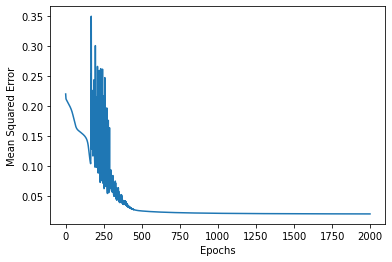

In [6]:
weight_matrices = [] #list to be passed to the fit function, to be updated with weight matrices
sfnw.fit(XX_train, Y_train, weight_matrices, 
         epochs=2000, learning_rate=5, 
         display_loss=True, display_weight=True)

### Visualizing hidden neuron outputs(functions)
**seeing what each hidden layer neurons are doing**

predict_h1 -> output of THAT neuron for each input in an array.  
similarly all neuron outputs.

**(plotting input-ouput function)**

- just like plotting any other function: for an input grid, etc. - call the function to get ouputs - and plot with that input-output

here plotting **input-hidden_neuron_ouput**  
**"hidden neuron functions"**

simple FF net -> input is 2D and 1 ouput. So we CAN visualize the "fucntions".  
input grid - each point(coordinate) - as an input to the function(hidden neruon) - corresponding output - plot

np.c_ => column stack.  
given vectors as columns of a matrix and return the matrix.  
"row" of such a matrix will be a n element array with i-th element from each input vector.  
np.c_\[X2_grid.ravel(), Y2_grid.ravel()] -> then rows of matrix ( out[i] ) will be all (x,y) coordinate points 

contour-f . 'f' => filled. (color filled)

#### unpacking

"*"  
unpacks a tuple/list into individual elements  
(usually when calling function - original function definition has multiple arguments - the tuple/list get automatically unpacked into those elements)  

** -> for dictionary  
equivalent to  writing key1=value1, key2=value2... - **which is like passing arg_name=value in functions**

#### packing

packs elements into a tuple
(usually when defining function - then called with multiple arguments and they get packed together into dictionary)

packing, unpacking in functions/-

True

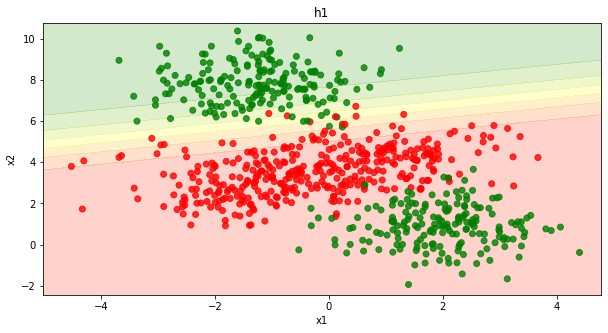

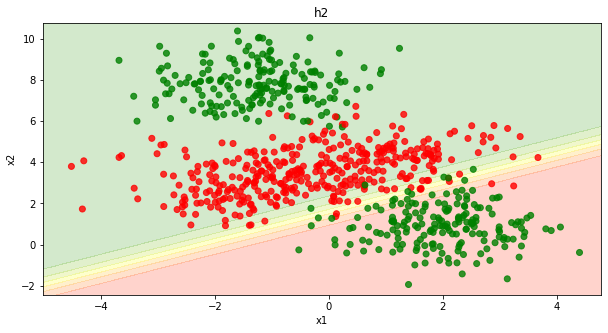

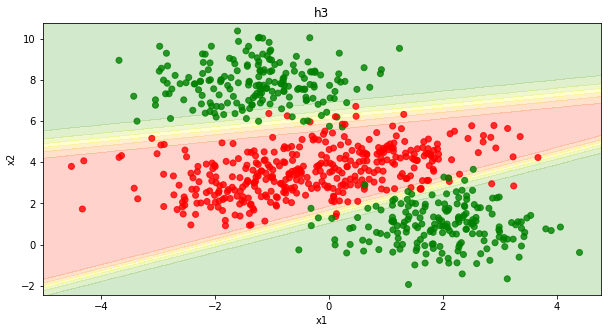

In [9]:
# make meshgrid from axis vectors, spacing 
# return grids
def make_meshgrid(Xax, Yax, h=0.2): # h=spacing
    # X-Y grid
    # make a grid of points on which we will do a contour plot.
    # min, max - as we don't know it.
    # little extra margin on both sides.
    x_min, x_max = Xax.min() - 0.5, Xax.max() + 0.5
    y_min, y_max = Yax.min() - 0.5, Yax.max() + 0.5
    # line space in the found range and meshgrid using that.
    X2_grid, Y2_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return X2_grid, Y2_grid



# plot : given, input(meshgrid) and function
# fun is the "function" - being plotted
def plot_function(ax, fun, X2_grid, Y2_grid, **params):
    
    # ax - axis handler for plotting
    # params for plotting. (packing)

    # finding each-neuron output for each input in the meshgrid - to plot.(contour, output as color.)
    Z = fun(
        np.c_[X2_grid.ravel(), Y2_grid.ravel()]
    )  # flattening X-grid and Y-grid and column-stacking them
    # row of resulting matrix will be all (x,y) coordinates.

    Z2 = Z.reshape(X2_grid.shape)  # Z is a vector. we need a matrix. as output mesh.
    out = ax.contourf(X2_grid, Y2_grid, Z2, **params)
    return out


def plot_hidden_neuron_functions():
    
    # x1, x2 inputs
    # meshgrid from that
    X2_grid, Y2_grid = make_meshgrid(XX_train[:, 0], XX_train[:, 1])

    # list of functions (to be plotted)
    predict_functions = [sfnw.predict_h1, sfnw.predict_h2, sfnw.predict_h3]

    for i in range(3):
        fig, ax = plt.subplots(figsize=(10, 5))

        plot_function(ax, predict_functions[i], X2_grid, Y2_grid, cmap=my_cmap, alpha=0.2)
        
        # plot datapoints also over it. 
        # color = ouput (class)
        ax.scatter(
            XX_train[:, 0], XX_train[:, 1], c=Y_train, cmap=my_cmap, alpha=0.8
        )  # plot input points also.
        
        ax.set_xlim(X2_grid.min(), X2_grid.max())
        ax.set_ylim(Y2_grid.min(), Y2_grid.max())
        ax.set_xlabel("x1") # "feature"
        ax.set_ylabel("x2")
        ax.set_title("h" + str(i + 1))

    return True


plot_hidden_neuron_functions()

**The background contour plot - is ouput of each neuron to a mesh of inputs. ie, we are plotting the FUNCTION at the ouput of each neurons.**

**First layer neurons - each add a line.**

next layer - ??

not direct. - as last sigmoid is not directly on linear combination - but on linear combination of sigmoid of linear combinatioons.. 

Though the essential seperation in h3 is like a combination of h1 and h2 - its not exactly the same. There is some squishing, etc.. going on. 

second layer is not 'adding' a line ?

### Visualising weights

how wights change.. - across epochs.. 

the "weight matrix" is such that - layers can be interpreted

0 , b3, w5, w6, 0 , 0  
b1, w1, w2, b2, w3, w4

<img src="model_pictures/simple_ff_net.png" width="20%" height="20%" />

In [ ]:
import seaborn as sns
import imageio
from IPython.display import HTML

#### heatmap of weight matrices

In [13]:
# weight_matrices - list of "special-weight-matrix" (matrix with weights, biases) -each epochs

# draw heatmap of e-th weight matrix and return that 'image'
def draw_heat_map(epoch):    
    
    fig = plt.figure(figsize=(10, 1))
    
    # heatmap
    sns.heatmap(weight_matrices[epoch], annot=True, cmap=my_cmap, vmin=-3, vmax=3)
    # specifying min and max, so that value don't change everytime the weight change - same color.
    plt.title("Epoch " + str(epoch))

    fig.canvas.draw()
    # canvas buffer into an image
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype="uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

### gif

/tmp/ipykernel_11657/2684172292.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 1))


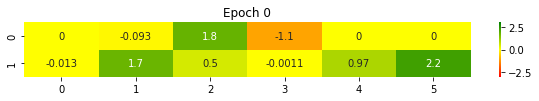

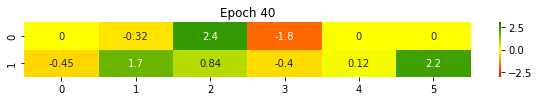

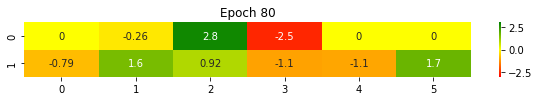

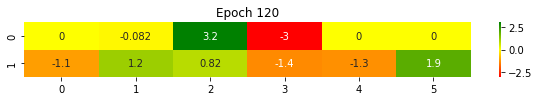

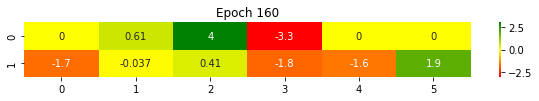

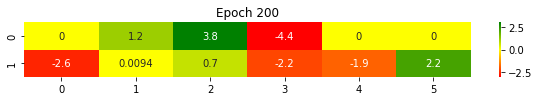

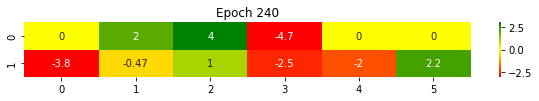

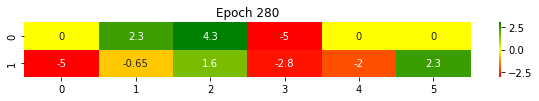

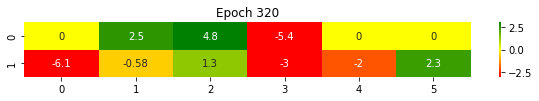

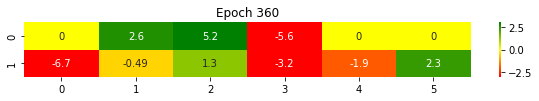

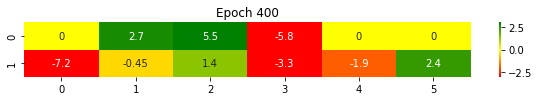

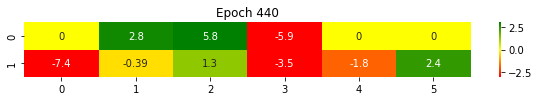

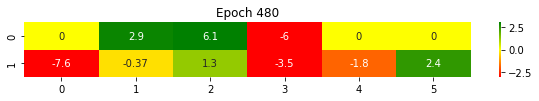

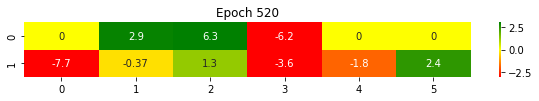

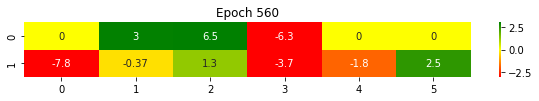

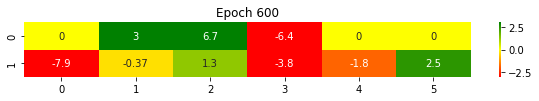

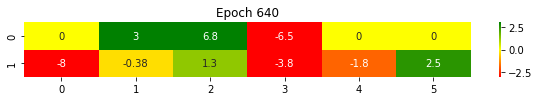

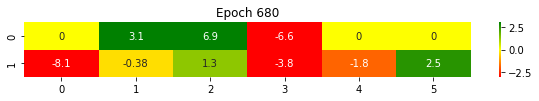

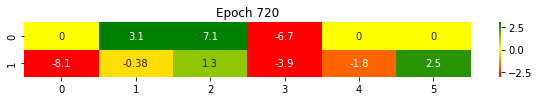

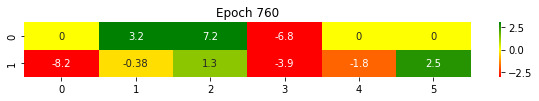

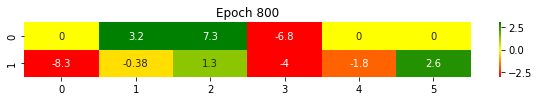

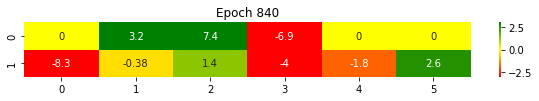

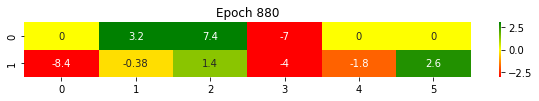

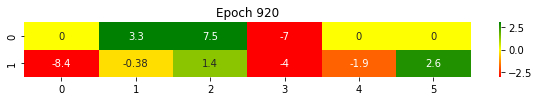

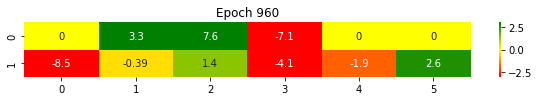

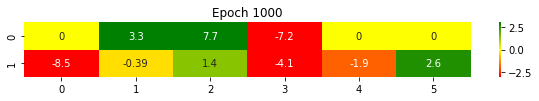

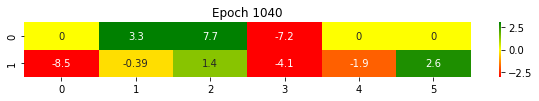

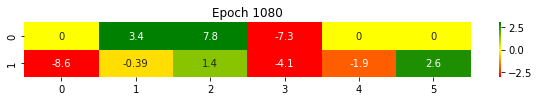

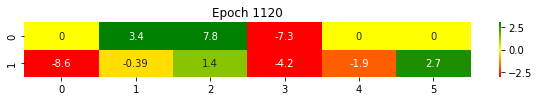

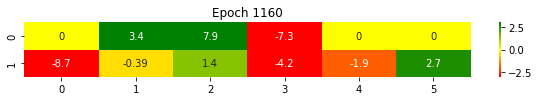

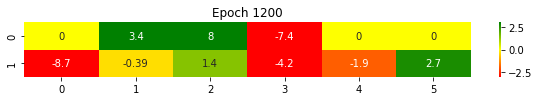

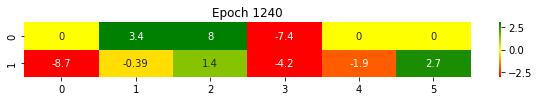

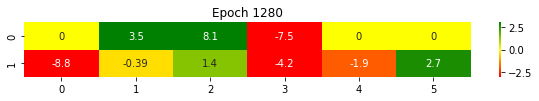

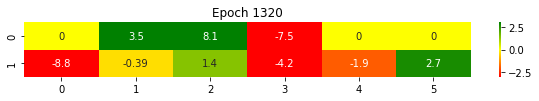

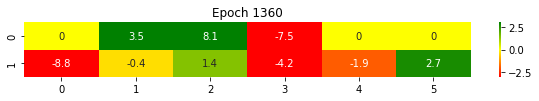

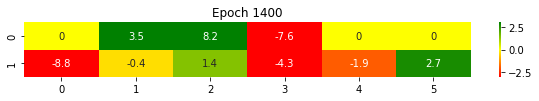

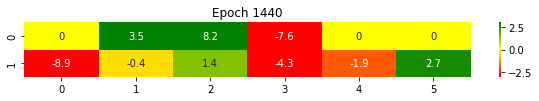

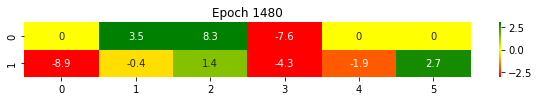

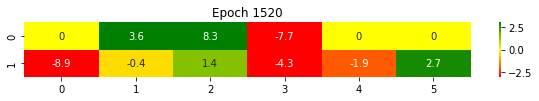

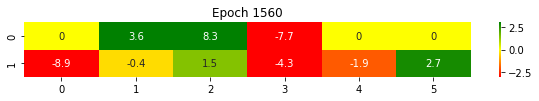

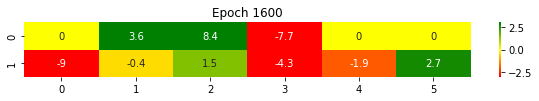

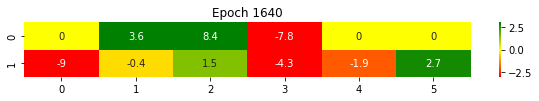

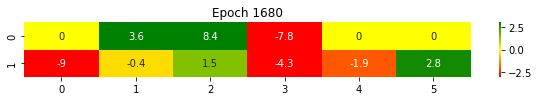

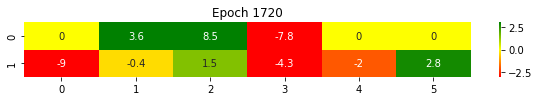

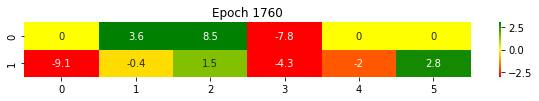

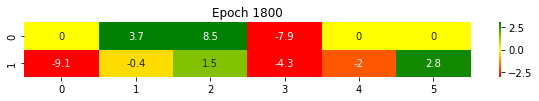

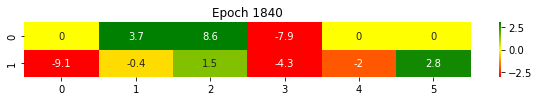

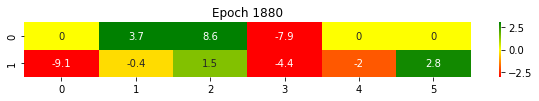

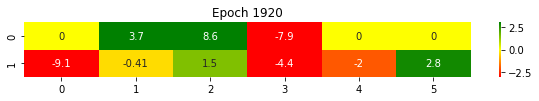

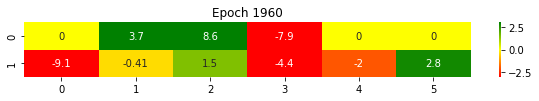

In [20]:
# making a gif from the above images 
# image every 'n' epoch - not for all epochs.
imageio.mimsave(
    "./weights_viz.gif",
    [draw_heat_map(i) for i in range(0, len(weight_matrices), len(weight_matrices) // 50)],
    fps=1,
)

# displaying the gif
from IPython import display

HTML('<img src="weights_viz.gif">')

further down - not much change. 

if a weight is very close to 0, then that means the corresponding thing is not an important one. 

weights(b/w input and first layer) - interpret which features are salient and which features are not.  
saliency => which feature play a role in output, ..  

